# Machine Learning - Homework 2: Part 1

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

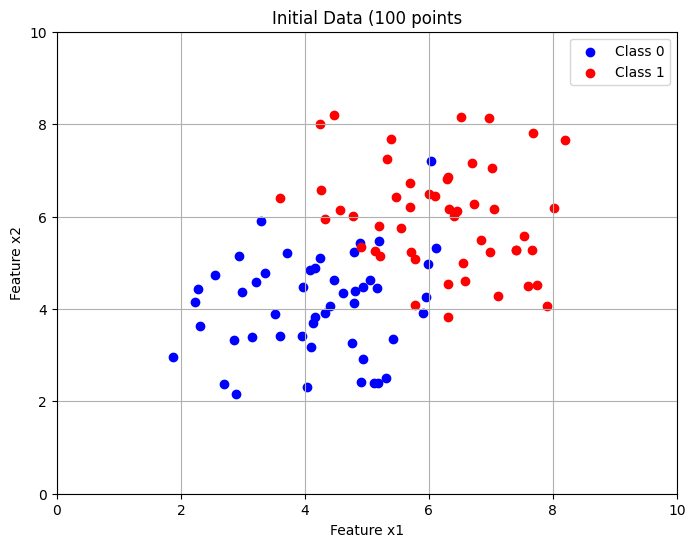

In [53]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_points_per_class, seed):
    """
    Generates a 2-class dataset with 2 features.
    The classes are Gaussian clusters that have some overlap.

    Args:
    n_points_per_class (int): Number of points for class 0 and class 1
    seed (int): Random seed for reproducibility

    Returns:
    X (ndarray): (n_points*2, 2) array of features
    y (ndarray): (n_points*2,) array of labels (0 or 1)
    """
    np.random.seed(seed)

    # Class 0 properties: Centered at (4, 4)
    mean_0 = [4, 4]
    # Covariance matrix: [[var_x, cov_xy], [cov_xy, var_y]]
    # This creates an elliptical cluster
    cov_0 = [[1.5, 0.5], [0.5, 1.5]]

    # Class 1 properties: Centered at (6, 6)
    mean_1 = [6, 6]
    # This cluster slants the other way
    cov_1 = [[1.5, -0.5], [-0.5, 1.5]]

    # Generate the points
    class_0_x = np.random.multivariate_normal(mean_0, cov_0, n_points_per_class)
    class_1_x = np.random.multivariate_normal(mean_1, cov_1, n_points_per_class)

    # Combine into X and y
    X = np.concatenate((class_0_x, class_1_x))
    y = np.array([0]*n_points_per_class + [1]*n_points_per_class)

    return X, y

# Dataset generation
seed = 42
n_points_total = 100
n_per_class = n_points_total // 2

X, y = generate_dataset(n_points_per_class=n_per_class, seed=seed)

# Displat the dataset
title = f"Initial Data ({n_points_total} points"
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

plt.xlim(0, 10) # Adjusted for new data
plt.ylim(0, 10) # Adjusted for new data
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.title(title)
plt.grid(True)
plt.show()

############# DO NOT CHANGE THIS PART #############

# Machine Learning - Homework 2: Part 2

## 1. Dataset Generation

The dataset that will be used throughout this part is already created and split for you. Do not change any part of the code below.

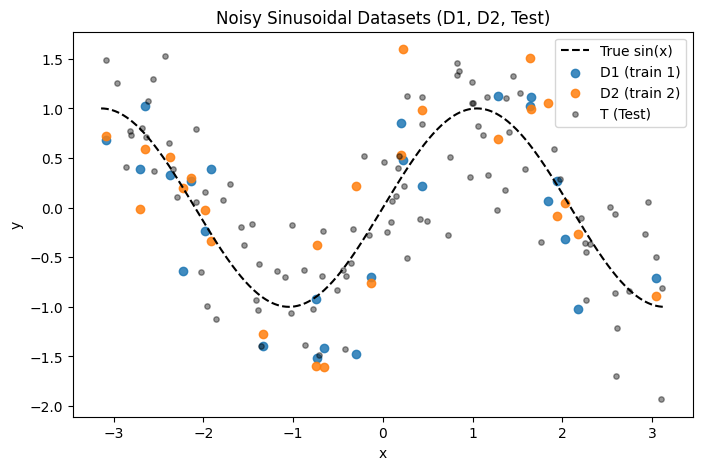

In [54]:
############# DO NOT CHANGE THIS PART #############

import numpy as np
import matplotlib.pyplot as plt

# Initial configurations
N_train = 25                 # points in D1 and D2
N_test = 100                 # points in test set
sigma = 0.5                 # standard deviation of noise
period = 2 * np.pi           # one period of sine wave
freq = 1.5                   # frequency of the sinusoidal
start_point = -period/2
end_point = start_point + period

# Dataset generation function
def make_dataset(n_points, sigma, seed_x, seed_noise):
    rng_x = np.random.default_rng(seed_x)
    rng_n = np.random.default_rng(seed_noise)

    X = np.sort(rng_x.uniform(start_point, end_point, size=n_points))
    noise = rng_n.normal(0.0, sigma, size=n_points)
    y = np.sin(freq*X) + noise

    return X.reshape(-1, 1), y

# Create datasets
X1, y1 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412067)  # D1
X2, y2 = make_dataset(N_train, sigma, seed_x=412955, seed_noise=412085)  # D2
Xt, yt = make_dataset(N_test,  sigma, seed_x=412738, seed_noise=412222)  # Test set

# Visualize the generated data
plt.figure(figsize=(8,5))
x_true = np.linspace(start_point, end_point, 400)
y_true = np.sin(freq*x_true)

plt.plot(x_true, y_true, 'k--', label='True sin(x)')
plt.scatter(X1, y1, color='tab:blue', label='D1 (train 1)', alpha=0.85)
plt.scatter(X2, y2, color='tab:orange', label='D2 (train 2)', alpha=0.85)
plt.scatter(Xt, yt, color='black', label='T (Test)', alpha=0.4, s=15)
plt.legend()
plt.title("Noisy Sinusoidal Datasets (D1, D2, Test)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


############# DO NOT CHANGE THIS PART #############

# **Your job starts here!**


In [55]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def bce_loss(w, Xb, y):
    z = Xb @ w
    p = sigmoid(z)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def grad(w, Xb, y):
    p = sigmoid(Xb @ w)
    return (Xb.T @ (p - y)) / Xb.shape[0]


In [56]:
N = X.shape[0]
Xb = np.hstack([np.ones((N,1)), X])   # [1, x1, x2]

def error_rate(w, Xb, y):
    p = sigmoid(Xb @ w)
    yhat = (p >= 0.5).astype(int)
    return 1.0 - (yhat == y).mean()

def plot_decision_boundary_and_points(w, X, y, title_extra=""):
    plt.figure(figsize=(7,5))
    plt.scatter(X[y==0,0], X[y==0,1], label="Class 0", alpha=0.9)
    plt.scatter(X[y==1,0], X[y==1,1], label="Class 1", alpha=0.9)
    if abs(w[2]) > 0:  
        x1_line = np.linspace(0, 10, 400)
        x2_line = -(w[0] + w[1]*x1_line) / w[2]
        plt.plot(x1_line, x2_line, label="Decision boundary")
    plt.xlim(0,10); plt.ylim(0,10)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.title(f"Logistic Regression {title_extra}")
    plt.legend(); plt.grid(True)
    plt.show()

w after 10 iters: [-0.08227622  0.04682356  0.03885895]
BCE after 10 iters: 0.6690125848532991
Error rate after 10 iters (fraction): 0.5


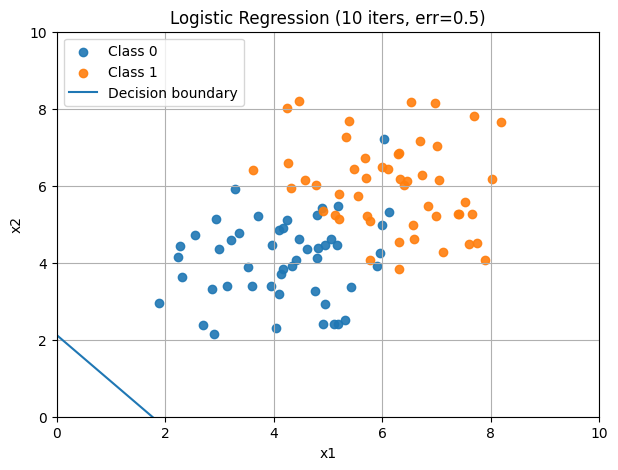

In [57]:
eta = 0.1
w = np.zeros(3)  # [w0, w1, w2]
history_10 = []

for t in range(10):
    J = bce_loss(w, Xb, y)
    history_10.append(J)
    g = grad(w, Xb, y)
    w = w - eta * g

err = error_rate(w, Xb, y)
print("w after 10 iters:", w)
print("BCE after 10 iters:", history_10[-1])
print("Error rate after 10 iters (fraction):", err)

plot_decision_boundary_and_points(w, X, y, title_extra=f"(10 iters, err={err})")

converged at iter 4102 (|delta J|<1e-05)
final w: [-10.57860174   1.02998669   1.04534704]
final BCE: 0.2629204866431975
final error rate: 0.08999999999999997


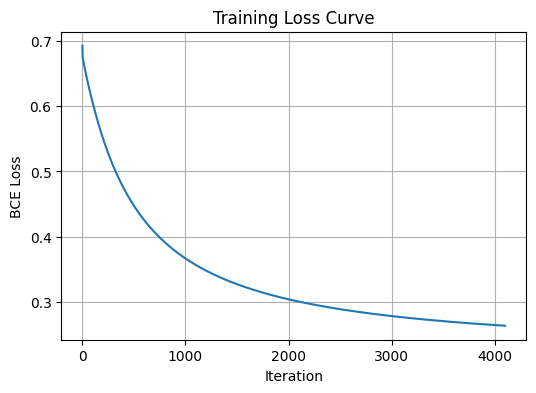

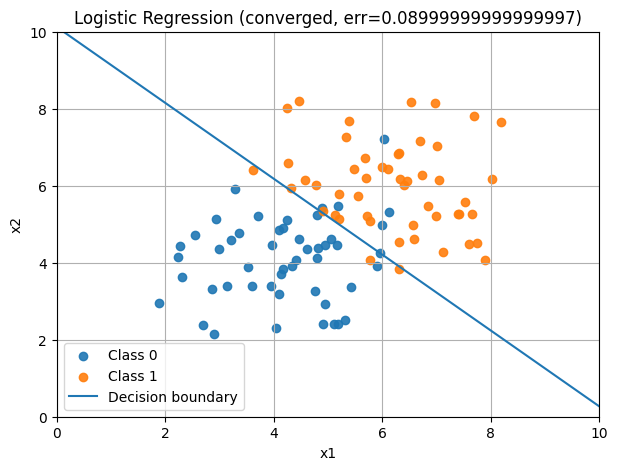

In [58]:
eta = 0.1
tol = 1e-5
max_iters = 20000  

w = np.zeros(3)
history = []
prev_J = None
stopped = None

for t in range(max_iters):
    J = bce_loss(w, Xb, y)
    history.append(J)
    g = grad(w, Xb, y)
    w = w - eta * g
    if prev_J is not None and abs(prev_J - J) < tol:
        stopped = f"converged at iter {t} (|delta J|<{tol})"
        break
    prev_J = J

if stopped is None:
    stopped = f"max iters reached: {max_iters}"

err = error_rate(w, Xb, y)
print(stopped)
print("final w:", w)
print("final BCE:", history[-1])
print("final error rate:", err)

# loss curve
plt.figure(figsize=(6,4))
plt.plot(history)
plt.xlabel("Iteration"); plt.ylabel("BCE Loss")
plt.title("Training Loss Curve")
plt.grid(True); plt.show()

plot_decision_boundary_and_points(w, X, y, title_extra=f"(converged, err={err})")

In [59]:
#PART 2 OF THE ASSIGNMENT

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

def poly_fit_predict(Xtr, ytr, Xte, degree, model="lin", alpha=0.0):
   
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    pftr = poly.fit_transform(Xtr)
    pte = poly.transform(Xte)
    if model == "lin":
        reg = LinearRegression(fit_intercept=False)
    else:
        reg = Ridge(alpha=alpha, fit_intercept=False)
    reg.fit(pftr, ytr)
    ytr_hat = reg.predict(pftr)
    yte_hat = reg.predict(pte)
    tr_mse = mean_squared_error(ytr, ytr_hat)
    te_mse = mean_squared_error(yt, yte_hat)  
    return reg, poly, ytr_hat, yte_hat, tr_mse, te_mse

def print_mse_table(rows, header=("Model","Train MSE","Test MSE")):
    print(f"{header[0]:<18} {header[1]:>12} {header[2]:>12}")
    for name, tr, te in rows:
        print(f"{name:<18} {tr:>12} {te:>12}")

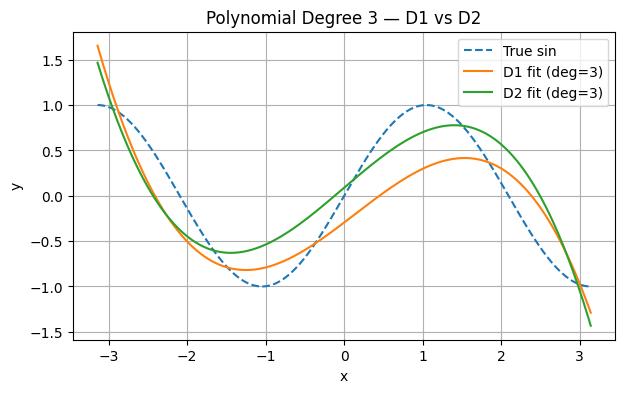

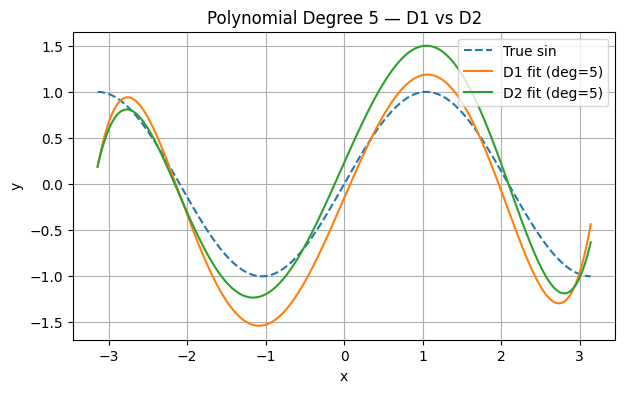

Test MSE
Model                 Train MSE     Test MSE
deg=3 on D1        0.41541487436789554 0.3757595096779919
deg=3 on D2        0.4066861853717117 0.35494090139453066
deg=5 on D1        0.17130662485068038 0.37718475740902874
deg=5 on D2        0.21280940000421047 0.388650536336721


In [61]:
rows = []

# deg=3, D1
reg1, poly1, y1_hat, yt_hat, tr1, te1 = poly_fit_predict(X1, y1, Xt, degree=3, model="lin")
rows.append(("deg=3 on D1", tr1, te1))
# deg=3, D2
reg2, poly2, y2_hat, yt_hat2, tr2, te2 = poly_fit_predict(X2, y2, Xt, degree=3, model="lin")
rows.append(("deg=3 on D2", tr2, te2))

xx = np.linspace(start_point, end_point, 400).reshape(-1,1)
yy_true = np.sin(freq*xx)
yy_hat1 = reg1.predict(poly1.transform(xx))
yy_hat2 = reg2.predict(poly2.transform(xx))

plt.figure(figsize=(7,4))
plt.plot(xx, yy_true, linestyle="--", label="True sin")
plt.plot(xx, yy_hat1, label="D1 fit (deg=3)")
plt.plot(xx, yy_hat2, label="D2 fit (deg=3)")
plt.title("Polynomial Degree 3 — D1 vs D2")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True); plt.show()

# deg=5, D1 & D2
reg3, poly3, _, _, tr3, te3 = poly_fit_predict(X1, y1, Xt, degree=5, model="lin")
rows.append(("deg=5 on D1", tr3, te3))
reg4, poly4, _, _, tr4, te4 = poly_fit_predict(X2, y2, Xt, degree=5, model="lin")
rows.append(("deg=5 on D2", tr4, te4))

yy_hat3 = reg3.predict(poly3.transform(xx))
yy_hat4 = reg4.predict(poly4.transform(xx))

plt.figure(figsize=(7,4))
plt.plot(xx, yy_true, linestyle="--", label="True sin")
plt.plot(xx, yy_hat3, label="D1 fit (deg=5)")
plt.plot(xx, yy_hat4, label="D2 fit (deg=5)")
plt.title("Polynomial Degree 5 — D1 vs D2")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(True); plt.show()

print("Test MSE")
print_mse_table(rows)

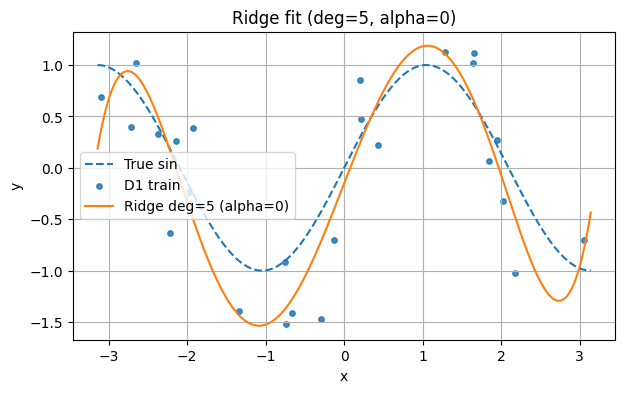

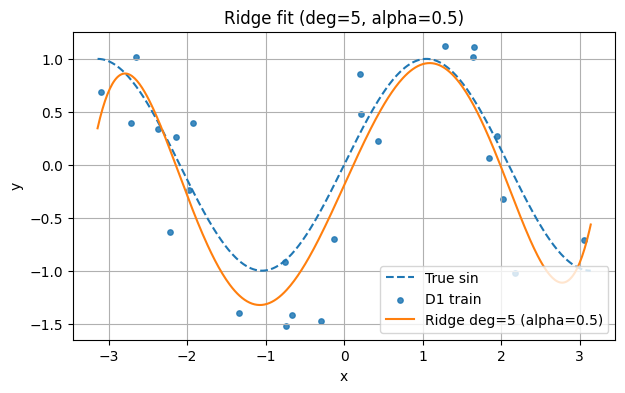

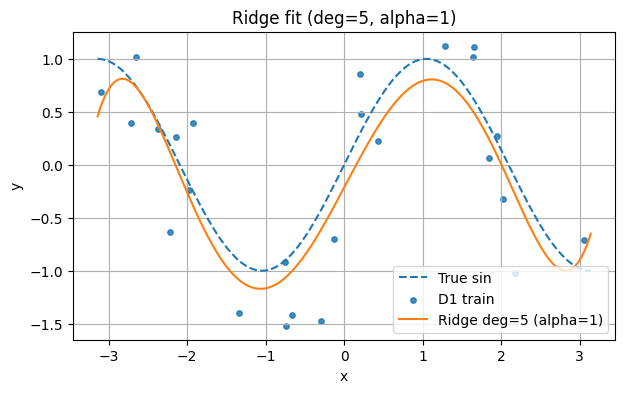

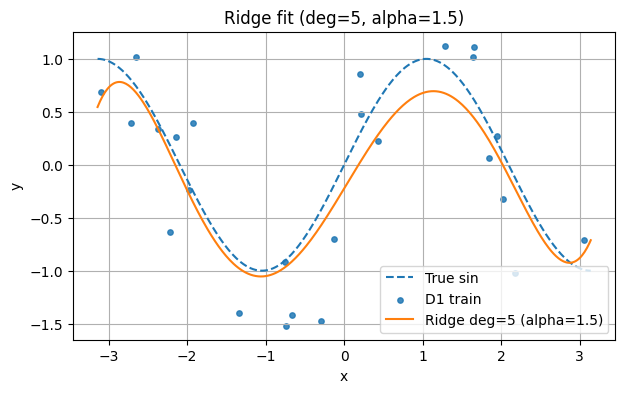

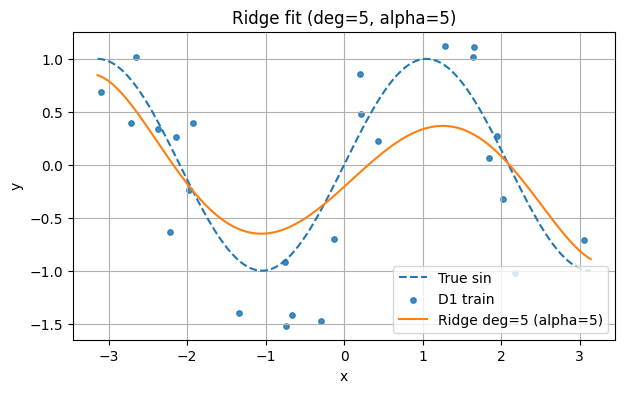

Ridge — Train/Test MSE tables for various alphas
Model                 Train MSE     Test MSE
alpha=0            0.17130662485068043 0.3771847574090092
alpha=0.5          0.18323410964555478 0.3026283057666039
alpha=1            0.20595131209436623 0.27618910041589484
alpha=1.5          0.2306168108288399 0.2698464687721466
alpha=5            0.35959046408678425 0.3222352596461863


In [62]:
alphas = [0, 0.5, 1, 1.5, 5]
rows_ridge = []
for a in alphas:
    reg, poly, ytr_hat, yte_hat, tr_mse, te_mse = poly_fit_predict(X1, y1, Xt, degree=5, model="ridge", alpha=a)
    rows_ridge.append((f"alpha={a}", tr_mse, te_mse))
    xx = np.linspace(start_point, end_point, 400).reshape(-1,1)
    yy_true = np.sin(freq*xx)
    yy_hat = reg.predict(poly.transform(xx))
    plt.figure(figsize=(7,4))
    plt.plot(xx, yy_true, linestyle="--", label="True sin")
    plt.scatter(X1, y1, s=15, alpha=0.85, label="D1 train")
    plt.plot(xx, yy_hat, label=f"Ridge deg=5 (alpha={a})")
    plt.title(f"Ridge fit (deg=5, alpha={a})")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(); plt.grid(True); plt.show()

print("Ridge — Train/Test MSE tables for various alphas")
print_mse_table(rows_ridge)